In [1]:
from sklearn.datasets import load_wine
import numpy as np
data = load_wine()
print(data.target_names)
print(data.feature_names)
print(data.DESCR)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    =========================

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled =scaler.fit_transform(data.data)

In [3]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=None, affinity="euclidean",linkage='ward',distance_threshold=0)            
y = model.fit_predict(X_scaled)

In [4]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

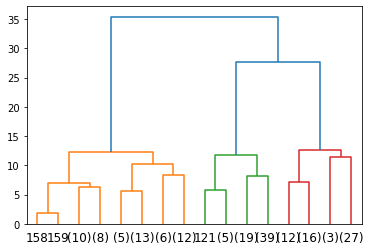

In [5]:
from scipy.cluster.hierarchy import dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)

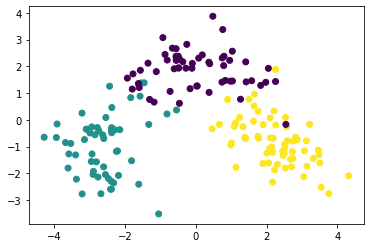

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage='ward') 
modelPredict = model.fit_predict(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1],c = modelPredict)
plt.show()

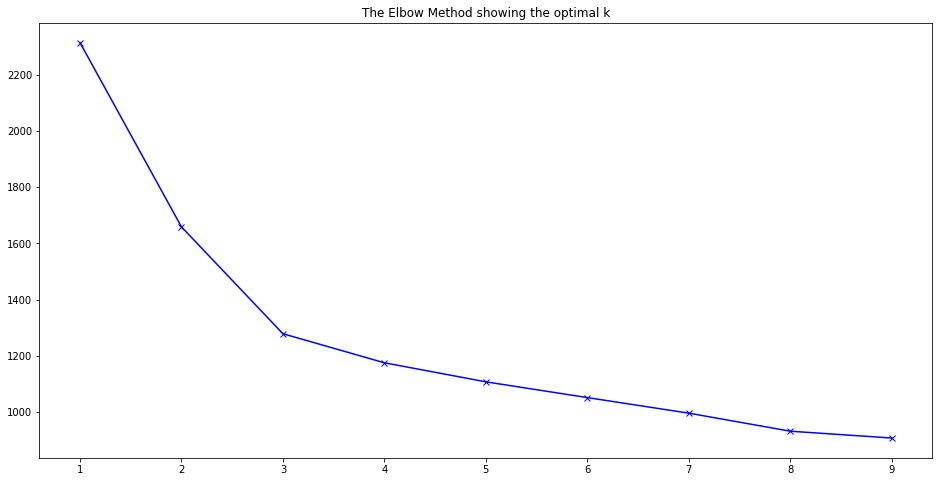

In [7]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X_scaled)
    distortions.append(kmean.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.title('The Elbow Method showing the optimal k')
plt.show()

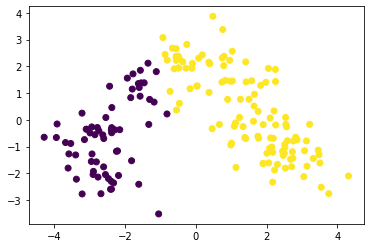

In [8]:
kmeans2 = KMeans(n_clusters=2,random_state=0).fit(X_scaled)
kmeans2 = kmeans2.predict(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1],c = kmeans2)
plt.show()

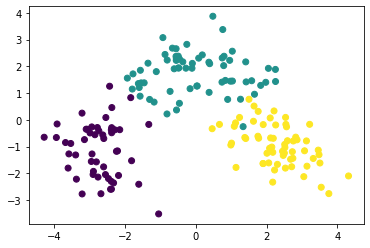

In [9]:
kmeans3 = KMeans(n_clusters=3,random_state=0).fit(X_scaled)
kmeans3 = kmeans3.predict(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1],c = kmeans3)
plt.show()

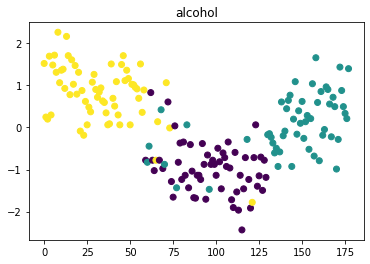

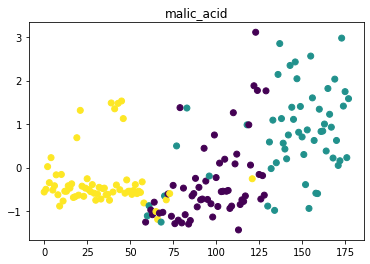

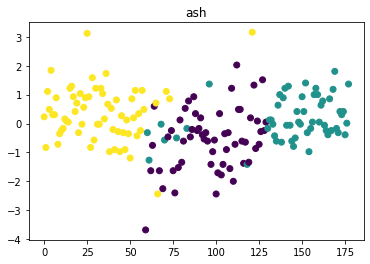

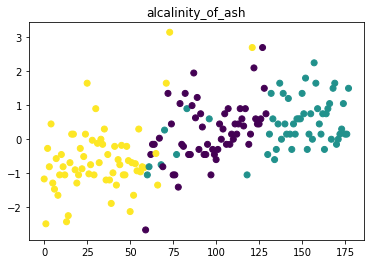

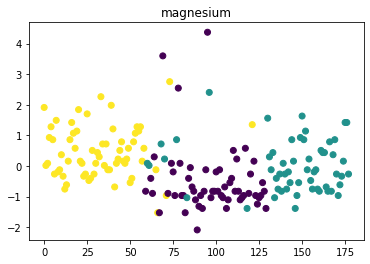

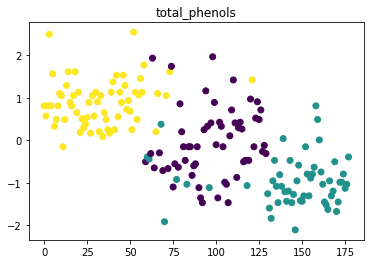

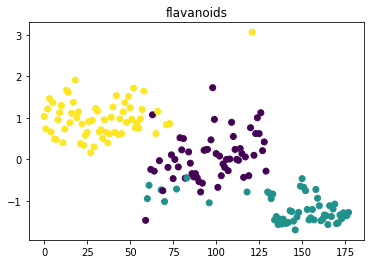

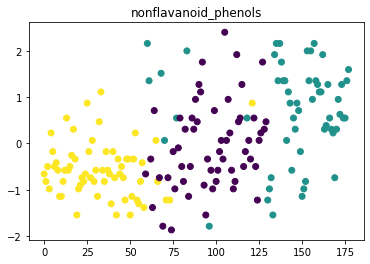

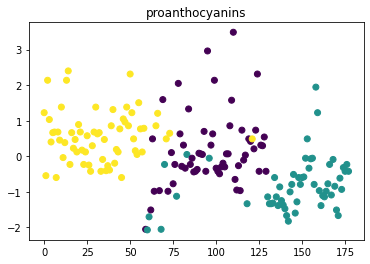

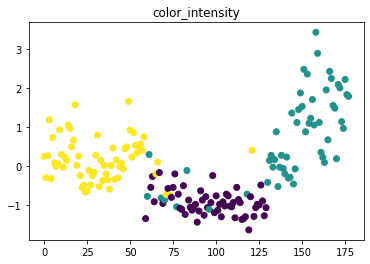

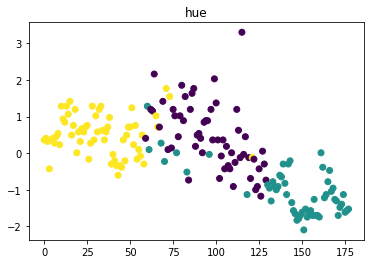

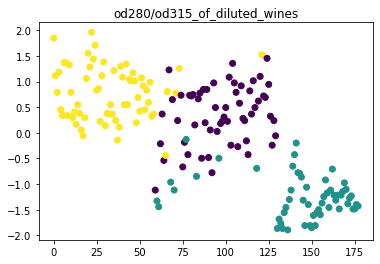

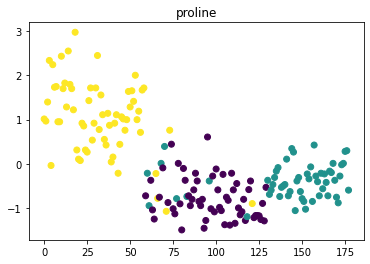

In [14]:
for i in range(13):
    plt.scatter(range(178),X_scaled[:,i],c=modelPredict)
    plt.title(data.feature_names[i])
    plt.show()

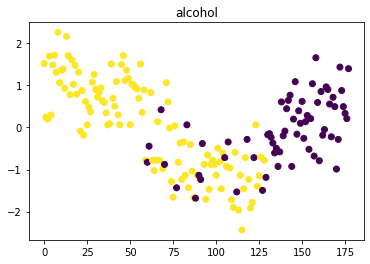

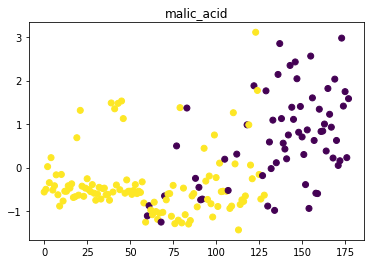

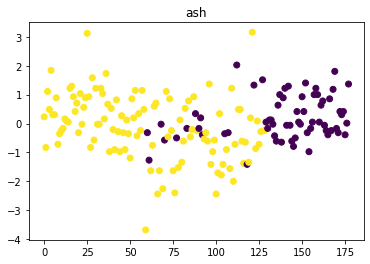

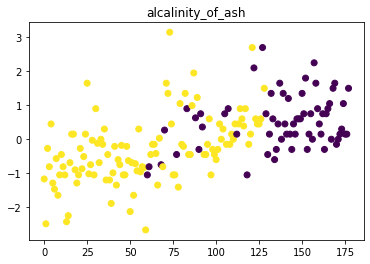

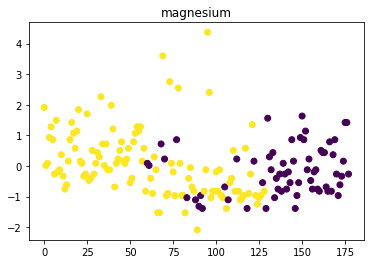

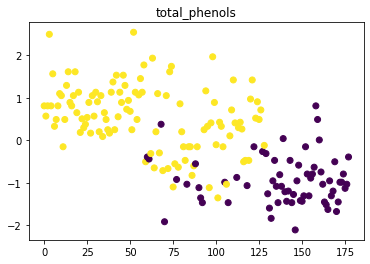

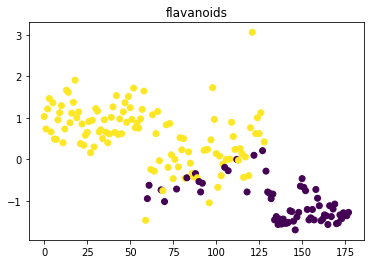

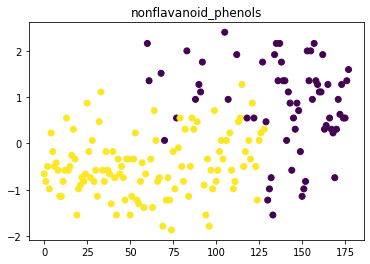

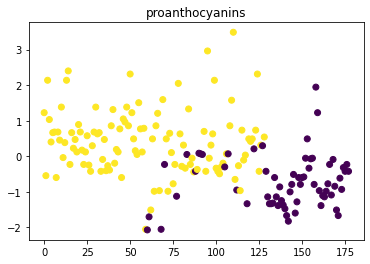

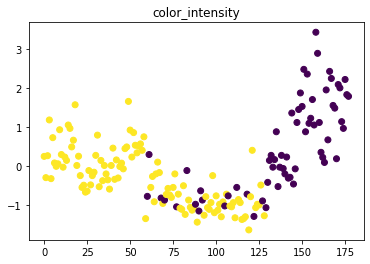

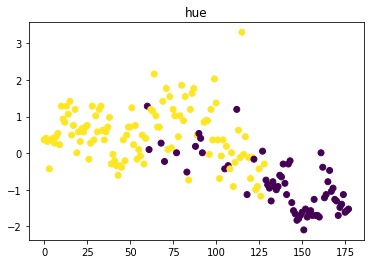

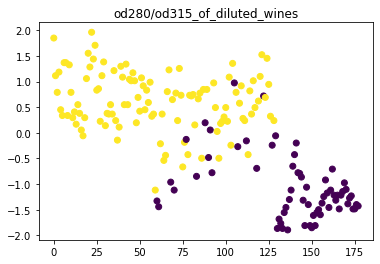

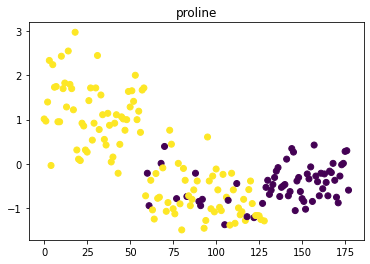

In [12]:
for i in range(13):
    plt.scatter(range(178),X_scaled[:,i],c=kmeans2)
    plt.title(data.feature_names[i])
    plt.show()

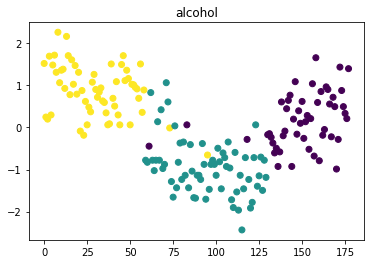

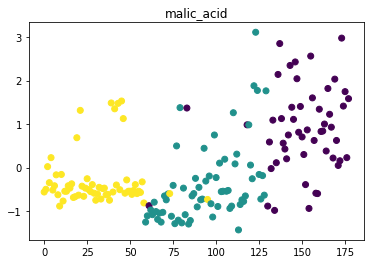

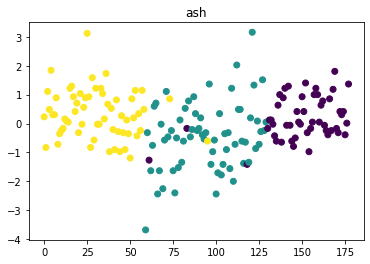

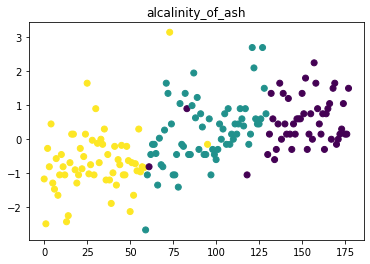

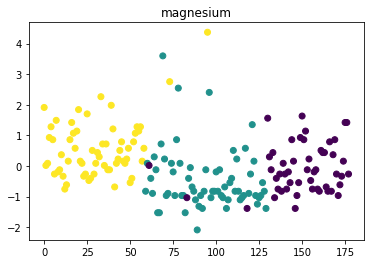

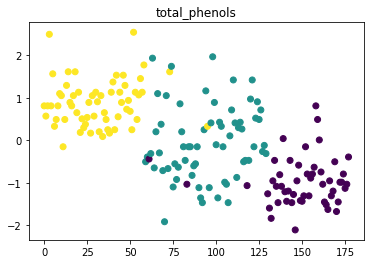

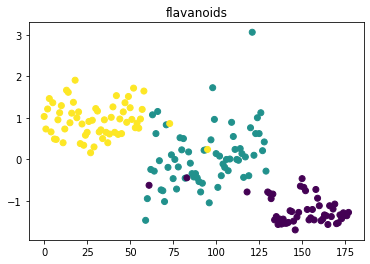

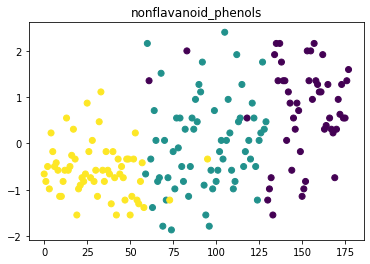

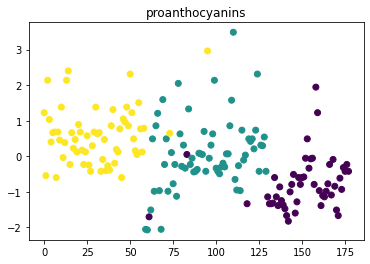

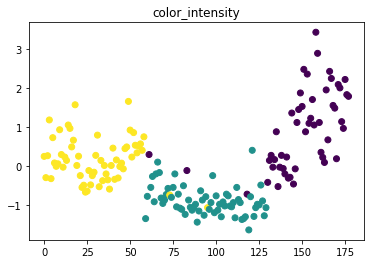

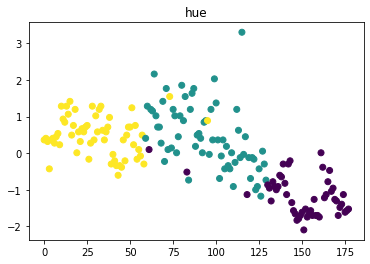

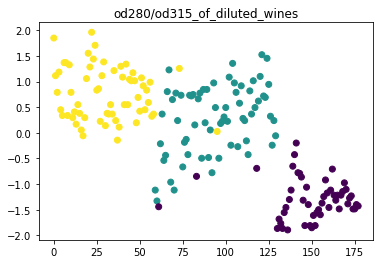

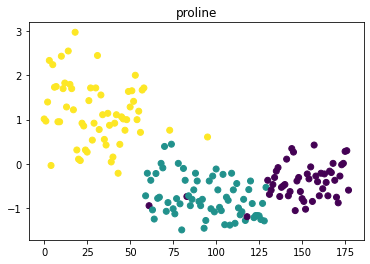

In [13]:
for i in range(13):
    plt.scatter(range(178),X_scaled[:,i],c=kmeans3)
    plt.title(data.feature_names[i])
    plt.show()